In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
from matplotlib.backends.backend_pdf import PdfPages
sns.set(style="whitegrid")
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pylab as plt
from math import sqrt

In [2]:
dir_origen_csv = "./CSV_generated/"
dir_export = "./Images_generated/3/"
dir_datasets = "./Datasets_original/"

In [3]:
file_name1 = dir_origen_csv + "medidores_casi_uniformes2.csv"
df = pd.read_csv(file_name1, low_memory = False, sep=",")
df["datetime"] =  pd.to_datetime(df["fecha"])#transforming "fecha" to datetime
df['dayNumber'] = df['datetime'].dt.dayofweek
df["fecha"] = df["datetime"].dt.date
df["hora"] = df["datetime"].dt.hour
df.columns

Index(['fecha', 'medidor', 'lectura_id_orig', 'voltajeA', 'voltajeB',
       'voltajeC', 'corrienteA', 'corrienteB', 'corrienteC', 'modelo',
       'angvoltajeA', 'angvoltajeB', 'angvoltajeC', 'angcorrienteA',
       'angcorrienteB', 'angcorrienteC', 'powerfactorsystem', 'totalkwh',
       'totalkvarh', 'Maxkw', 'Maxkvar', 'fechamaxkw', 'fechamaxkvar',
       'frecuencia', 'Latitud', 'Longitud', 'CLASIFICACION', 'kwh_consumido',
       'kvarh_consumido', 'tipo_consumo', 'clasificacion_encoded',
       'modelo_encoded', 'tipo_consumo_encoded', 'kwh_hora', 'dayMonth',
       'datetime', 'dayNumber', 'hora'],
      dtype='object')

## Normalizing kwh_consumido column

In [4]:
df["kwh_consumido"] = (df["kwh_consumido"] - df["kwh_consumido"].min())/(df["kwh_consumido"].max() - df["kwh_consumido"].min()) 

### Max date

In [5]:
max(df.fecha)

datetime.date(2019, 6, 3)

### Min date

In [6]:
min(df.fecha)

datetime.date(2019, 4, 4)

### Range of dates to extract the first week of each month

In [7]:
w1_month1_date1=datetime.date(2019,4,1)
w1_month1_date2=datetime.date(2019,4,7)

w1_month2_date1=datetime.date(2019,4,29)
w1_month2_date2=datetime.date(2019,5,5)

w1_month3_date1=datetime.date(2019,5,27)
w1_month3_date2=datetime.date(2019,6,2)

In [8]:


df['W1_L_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==0) ,:]['kwh_consumido'] 
df['W1_L_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==0),:]['kwh_consumido'] 
df['W1_L_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==0),:]['kwh_consumido'] 

df['W1_MA_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==1),:]['kwh_consumido'] 
df['W1_MA_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==1),:]['kwh_consumido']
df['W1_MA_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==1),:]['kwh_consumido']

df['W1_MI_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==2),:]['kwh_consumido']
df['W1_MI_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))&(df['hora']<=18) & (df['hora']>=12) &(df['dayNumber']==2),:]['kwh_consumido']
df['W1_MI_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==2),:]['kwh_consumido']

df['W1_J_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==3),:]['kwh_consumido']
df['W1_J_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==3),:]['kwh_consumido']
df['W1_J_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==3),:]['kwh_consumido']

df['W1_V_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==4),:]['kwh_consumido'] 
df['W1_V_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==4),:]['kwh_consumido'] 
df['W1_V_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==4),:]['kwh_consumido'] 

df['W1_S_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==5),:]['kwh_consumido'] 
df['W1_S_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==5),:]['kwh_consumido'] 
df['W1_S_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==5),:]['kwh_consumido'] 

df['W1_D_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==6),:]['kwh_consumido']
df['W1_D_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==6),:]['kwh_consumido']
df['W1_D_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==6),:]['kwh_consumido']

### Range of dates to extract the second week of each month

In [9]:
w2_month1_date1=datetime.date(2019,4,8)
w2_month1_date2=datetime.date(2019,4,14)

w2_month2_date1=datetime.date(2019,5,6)
w2_month2_date2=datetime.date(2019,5,12)

w2_month3_date1=datetime.date(2019,6,3)
w2_month3_date2=datetime.date(2019,6,9)

In [10]:
df['W2_L_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))|((df['fecha']>=w2_month3_date1)&(df['fecha']<=w2_month3_date2))&(df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==0) ,:]['kwh_consumido']
df['W2_L_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))|((df['fecha']>=w2_month3_date1)&(df['fecha']<=w2_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==0),:]['kwh_consumido'] 
df['W2_L_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))|((df['fecha']>=w2_month3_date1)&(df['fecha']<=w2_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==0),:]['kwh_consumido'] 

df['W2_MA_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==1),:]['kwh_consumido']  
df['W2_MA_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==1),:]['kwh_consumido'] 
df['W2_MA_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==1),:]['kwh_consumido'] 

df['W2_MI_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==2),:]['kwh_consumido']  
df['W2_MI_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==2),:]['kwh_consumido'] 
df['W2_MI_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==2),:]['kwh_consumido'] 

df['W2_J_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==3),:]['kwh_consumido']  
df['W2_J_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==3),:]['kwh_consumido'] 
df['W2_J_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==3),:]['kwh_consumido'] 

df['W2_V_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==4),:]['kwh_consumido']  
df['W2_V_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==4),:]['kwh_consumido'] 
df['W2_V_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==4),:]['kwh_consumido'] 

df['W2_S_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==5),:]['kwh_consumido']  
df['W2_S_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==5),:]['kwh_consumido'] 
df['W2_S_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==5),:]['kwh_consumido'] 

df['W2_D_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==6),:]['kwh_consumido']  
df['W2_D_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==6),:]['kwh_consumido'] 
df['W2_D_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==6),:]['kwh_consumido'] 


### Range of dates to extract the third week of each month

In [11]:
w3_month1_date1=datetime.date(2019,4,15)
w3_month1_date2=datetime.date(2019,4,21)

w3_month2_date1=datetime.date(2019,5,13)
w3_month2_date2=datetime.date(2019,5,19)

In [12]:
df['W3_L_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==0),:]['kwh_consumido']  
df['W3_L_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==0),:]['kwh_consumido'] 
df['W3_L_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==0),:]['kwh_consumido']

df['W3_MA_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==1),:]['kwh_consumido']  
df['W3_MA_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==1),:]['kwh_consumido'] 
df['W3_MA_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==1),:]['kwh_consumido']

df['W3_MI_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==2),:]['kwh_consumido']  
df['W3_MI_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==2),:]['kwh_consumido'] 
df['W3_MI_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==2),:]['kwh_consumido']

df['W3_J_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==3),:]['kwh_consumido']  
df['W3_J_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==3),:]['kwh_consumido'] 
df['W3_J_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==3),:]['kwh_consumido']

df['W3_V_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==4),:]['kwh_consumido']  
df['W3_V_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==4),:]['kwh_consumido'] 
df['W3_V_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==4),:]['kwh_consumido']

df['W3_S_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==5),:]['kwh_consumido']  
df['W3_S_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==5),:]['kwh_consumido'] 
df['W3_S_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==5),:]['kwh_consumido']

df['W3_D_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==6),:]['kwh_consumido']  
df['W3_D_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==6),:]['kwh_consumido'] 
df['W3_D_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==6),:]['kwh_consumido']


### Range of dates to extract the fourth week of each month

In [13]:
w4_month1_date1=datetime.date(2019,4,22)
w4_month1_date2=datetime.date(2019,4,28)

w4_month2_date1=datetime.date(2019,5,20)
w4_month2_date2=datetime.date(2019,5,26)

In [14]:
df['W4_L_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==0),:]['kwh_consumido']  
df['W4_L_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==0),:]['kwh_consumido'] 
df['W4_L_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==0),:]['kwh_consumido']

df['W4_MA_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==1),:]['kwh_consumido']  
df['W4_MA_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==1),:]['kwh_consumido'] 
df['W4_MA_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==1),:]['kwh_consumido']

df['W4_MI_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==2),:]['kwh_consumido']  
df['W4_MI_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==2),:]['kwh_consumido'] 
df['W4_MI_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==2),:]['kwh_consumido']

df['W4_J_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==3),:]['kwh_consumido']  
df['W4_J_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==3),:]['kwh_consumido'] 
df['W4_J_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==3),:]['kwh_consumido']

df['W4_V_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==4),:]['kwh_consumido']  
df['W4_V_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==4),:]['kwh_consumido'] 
df['W4_V_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==4),:]['kwh_consumido']

df['W4_S_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==5),:]['kwh_consumido']  
df['W4_S_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==5),:]['kwh_consumido'] 
df['W4_S_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==5),:]['kwh_consumido']

df['W4_D_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==6),:]['kwh_consumido']  
df['W4_D_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==6),:]['kwh_consumido'] 
df['W4_D_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==6),:]['kwh_consumido']

In [15]:
df_medidor_mes_franjas = df[['medidor','W1_L_m','W1_L_t','W1_L_n','W1_MA_m','W1_MA_t','W1_MA_n','W1_MI_m','W1_MI_t','W1_MI_n','W1_J_m','W1_J_t','W1_J_n','W1_V_m','W1_V_t','W1_V_n','W1_S_m','W1_S_t','W1_S_n','W1_D_m','W1_D_t','W1_D_n','W2_L_m','W2_L_t','W2_L_n','W2_MA_m','W2_MA_t','W2_MA_n','W2_MI_m','W2_MI_t','W2_MI_n','W2_J_m','W2_J_t','W2_J_n','W2_V_m','W2_V_t','W2_V_n','W2_S_m','W2_S_t','W2_S_n','W2_D_m','W2_D_t','W2_D_n','W3_L_m','W3_L_t','W3_L_n','W3_MA_m','W3_MA_t','W3_MA_n','W3_MI_m','W3_MI_t','W3_MI_n','W3_J_m','W3_J_t','W3_J_n','W3_V_m','W3_V_t','W3_V_n','W3_S_m','W3_S_t','W3_S_n','W3_D_m','W3_D_t','W3_D_n','W4_L_m','W4_L_t','W4_L_n','W4_MA_m','W4_MA_t','W4_MA_n','W4_MI_m','W4_MI_t','W4_MI_n','W4_J_m','W4_J_t','W4_J_n','W4_V_m','W4_V_t','W4_V_n','W4_S_m','W4_S_t','W4_S_n','W4_D_m','W4_D_t','W4_D_n']].groupby('medidor').mean()
df_medidor_mes_franjas

,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_J_n,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n
medidor,,,,,,,,,,,,,,,,,,,,,
15029835,0.001939,1.976659e-03,2.052503e-03,0.001938,0.001974,2.052503e-03,0.001939,0.001963,2.052503e-03,1.949691e-03,...,0.000505,0.000473,0.000486,0.000505,0.000485,0.000528,0.000505,0.000781,5.327939e-04,0.000505
15029844,0.002224,2.227553e-03,2.284335e-03,0.002224,0.002224,2.284335e-03,0.002231,0.002227,2.284335e-03,2.203355e-03,...,0.003054,0.002903,0.002918,0.003054,0.002920,0.002920,0.003054,0.002916,2.920927e-03,0.003054
15029846,0.107484,1.076711e-01,1.073821e-01,0.107573,0.107465,1.073821e-01,0.107041,0.107577,1.073821e-01,1.071677e-01,...,0.107530,0.107520,0.108431,0.107530,0.107628,0.108206,0.107530,0.107608,1.081048e-01,0.107530
15029847,0.007442,7.565034e-03,7.635612e-03,0.007589,0.007925,7.635612e-03,0.007558,0.007829,7.635612e-03,7.570069e-03,...,0.009156,0.008946,0.008765,0.009156,0.008750,0.008770,0.009156,0.008759,8.896325e-03,0.009156
15029977,0.010659,1.063335e-02,1.070739e-02,0.010667,0.010598,1.070739e-02,0.010550,0.010705,1.070739e-02,1.063957e-02,...,0.009778,0.009733,0.009646,0.009778,0.009738,0.009787,0.009778,0.009619,9.635407e-03,0.009778
15842885,0.001906,1.914183e-03,1.911589e-03,0.001907,0.001998,1.911589e-03,0.001911,0.001960,1.911589e-03,1.914395e-03,...,0.002838,0.002767,0.002783,0.002838,0.002671,0.002670,0.002838,0.002674,2.669264e-03,0.002838
15842894,0.005253,5.587316e-03,5.353838e-03,0.005213,0.005495,5.353838e-03,0.005213,0.005511,5.353838e-03,5.225752e-03,...,0.005311,0.005112,0.005711,0.005311,0.005151,0.005758,0.005311,0.005034,5.032960e-03,0.005311
16567743,0.003088,3.239592e-03,3.176743e-03,0.003090,0.003193,3.176743e-03,0.003086,0.003232,3.176743e-03,3.124529e-03,...,0.002404,0.002314,0.002485,0.002404,0.002314,0.002721,0.002404,0.002312,2.481916e-03,0.002404
16567746,0.004301,4.263098e-03,4.285610e-03,0.004270,0.004252,4.285610e-03,0.004277,0.004259,4.285610e-03,4.268204e-03,...,0.004114,0.004148,0.004075,0.004114,0.004148,0.004070,0.004114,0.004140,4.070039e-03,0.004114


In [16]:
df_medidor_mes_franjas

,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_J_n,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n
medidor,,,,,,,,,,,,,,,,,,,,,
15029835,0.001939,1.976659e-03,2.052503e-03,0.001938,0.001974,2.052503e-03,0.001939,0.001963,2.052503e-03,1.949691e-03,...,0.000505,0.000473,0.000486,0.000505,0.000485,0.000528,0.000505,0.000781,5.327939e-04,0.000505
15029844,0.002224,2.227553e-03,2.284335e-03,0.002224,0.002224,2.284335e-03,0.002231,0.002227,2.284335e-03,2.203355e-03,...,0.003054,0.002903,0.002918,0.003054,0.002920,0.002920,0.003054,0.002916,2.920927e-03,0.003054
15029846,0.107484,1.076711e-01,1.073821e-01,0.107573,0.107465,1.073821e-01,0.107041,0.107577,1.073821e-01,1.071677e-01,...,0.107530,0.107520,0.108431,0.107530,0.107628,0.108206,0.107530,0.107608,1.081048e-01,0.107530
15029847,0.007442,7.565034e-03,7.635612e-03,0.007589,0.007925,7.635612e-03,0.007558,0.007829,7.635612e-03,7.570069e-03,...,0.009156,0.008946,0.008765,0.009156,0.008750,0.008770,0.009156,0.008759,8.896325e-03,0.009156
15029977,0.010659,1.063335e-02,1.070739e-02,0.010667,0.010598,1.070739e-02,0.010550,0.010705,1.070739e-02,1.063957e-02,...,0.009778,0.009733,0.009646,0.009778,0.009738,0.009787,0.009778,0.009619,9.635407e-03,0.009778
15842885,0.001906,1.914183e-03,1.911589e-03,0.001907,0.001998,1.911589e-03,0.001911,0.001960,1.911589e-03,1.914395e-03,...,0.002838,0.002767,0.002783,0.002838,0.002671,0.002670,0.002838,0.002674,2.669264e-03,0.002838
15842894,0.005253,5.587316e-03,5.353838e-03,0.005213,0.005495,5.353838e-03,0.005213,0.005511,5.353838e-03,5.225752e-03,...,0.005311,0.005112,0.005711,0.005311,0.005151,0.005758,0.005311,0.005034,5.032960e-03,0.005311
16567743,0.003088,3.239592e-03,3.176743e-03,0.003090,0.003193,3.176743e-03,0.003086,0.003232,3.176743e-03,3.124529e-03,...,0.002404,0.002314,0.002485,0.002404,0.002314,0.002721,0.002404,0.002312,2.481916e-03,0.002404
16567746,0.004301,4.263098e-03,4.285610e-03,0.004270,0.004252,4.285610e-03,0.004277,0.004259,4.285610e-03,4.268204e-03,...,0.004114,0.004148,0.004075,0.004114,0.004148,0.004070,0.004114,0.004140,4.070039e-03,0.004114


In [17]:
df_medidor_mes_franjas.isnull()

,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_J_n,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n
medidor,,,,,,,,,,,,,,,,,,,,,
15029835,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15029844,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15029846,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15029847,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15029977,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15842885,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15842894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16567743,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16567746,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
df_medidor_mes_franjas.isnull().sum().sum().sum()

0

In [20]:
df=df.groupby('medidor').mean()
df.iloc[0,:]

lectura_id_orig          1.289411e+06
voltajeA                 1.266730e+02
voltajeB                 1.255058e+02
voltajeC                 1.275229e+02
corrienteA               1.361034e-01
corrienteB               9.863067e-02
corrienteC               1.295902e-01
angvoltajeA              0.000000e+00
angvoltajeB              2.400000e+02
angvoltajeC              1.200000e+02
angcorrienteA            1.044041e+02
angcorrienteB            2.427737e+02
angcorrienteC            9.627222e+01
powerfactorsystem        8.296276e-01
totalkwh                 4.254341e+04
totalkvarh               1.160178e+04
Maxkw                    2.165951e+01
Maxkvar                  2.165951e+01
frecuencia               5.999971e+01
Latitud                 -1.568450e+00
Longitud                -7.947330e+01
kwh_consumido            9.335251e-04
kvarh_consumido          9.069278e-01
clasificacion_encoded    7.000000e+00
modelo_encoded           0.000000e+00
tipo_consumo_encoded     0.000000e+00
kwh_hora    

### CLUSTERS CONSUMO POR FRANJAS HORARIAS (0-11, 12-18, 19-23), SEMANAS (W1,W2,W3,W4) Y DIAS (L-J, V, S-D) POR MEDIO DE KMeans

k: 1  cost: 7.545705267404292
k: 2  cost: 2.4069990676927246
k: 3  cost: 0.6863856426641787
k: 4  cost: 0.4190128590406499
k: 5  cost: 0.2684556371880265
k: 6  cost: 0.1724312044573671
k: 7  cost: 0.09537256316656269
k: 8  cost: 0.07391768526882282
k: 9  cost: 0.05069072725013911


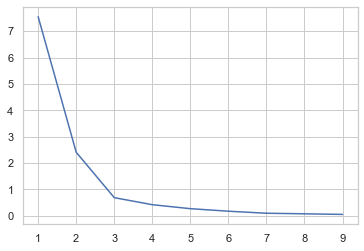

In [21]:
from sklearn.cluster import KMeans
 
A=df_medidor_mes_franjas
x=[]
y=[]
 
for k in range (1, 10):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(A.iloc[:, :])
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    x.append(k)
    y.append(interia)
    print ("k:",k, " cost:", interia)
plt.plot(x,y)

### Calculating the number of clusters

In [22]:
df_medidor_mes_franjas.values

array([[0.00193868, 0.00197666, 0.0020525 , ..., 0.000781  , 0.00053279,
        0.00050543],
       [0.00222394, 0.00222755, 0.00228433, ..., 0.00291591, 0.00292093,
        0.0030543 ],
       [0.10748352, 0.10767111, 0.10738211, ..., 0.10760778, 0.1081048 ,
        0.10752996],
       ...,
       [0.2202517 , 0.22571781, 0.22640267, ..., 0.22896276, 0.23353883,
        0.24064383],
       [0.04789487, 0.04659911, 0.04604992, ..., 0.05493641, 0.06187055,
        0.05632155],
       [0.01078096, 0.01110478, 0.01108333, ..., 0.00876423, 0.00948641,
        0.00908025]])

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'random')
X=df_medidor_mes_franjas.values
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [24]:
kmeans.cluster_centers_

array([[0.0081341 , 0.00827611, 0.00821721, 0.00816274, 0.00833272,
        0.00821721, 0.0081608 , 0.0083076 , 0.00821721, 0.00813038,
        0.00825062, 0.00821721, 0.00814705, 0.00834055, 0.00821721,
        0.00807749, 0.00830304, 0.00821721, 0.00803767, 0.0082242 ,
        0.00821721, 0.00873995, 0.00884249, 0.00884449, 0.00802175,
        0.00839281, 0.00800669, 0.00796087, 0.00835272, 0.00800669,
        0.00803029, 0.00841309, 0.00800669, 0.00792058, 0.00826951,
        0.00800669, 0.00787355, 0.00831749, 0.00800669, 0.00780909,
        0.00807187, 0.00800669, 0.0074361 , 0.00779602, 0.00751818,
        0.00749131, 0.00771162, 0.00751818, 0.00750545, 0.00775946,
        0.00751818, 0.00751566, 0.00781888, 0.00751818, 0.00753943,
        0.0078914 , 0.00751818, 0.0074795 , 0.00773645, 0.00751818,
        0.00750444, 0.00747667, 0.00751818, 0.00850825, 0.00891885,
        0.00865001, 0.00854397, 0.00889544, 0.00865001, 0.00853486,
        0.00890658, 0.00865001, 0.0085961 , 0.00

In [25]:
distance=kmeans.fit_transform(X)
distance

array([[0.06526369, 1.11597419],
       [0.05458942, 1.10510413],
       [0.92045775, 0.14039239],
       [0.01330929, 1.04349551],
       [0.01701279, 1.03468171],
       [0.05203731, 1.10267697],
       [0.02428123, 1.07372727],
       [0.04610964, 1.09638123],
       [0.03759755, 1.08842551],
       [0.07225134, 1.12311453],
       [0.07399409, 1.12485872],
       [0.07384508, 1.12470958],
       [0.07415086, 1.12501398],
       [0.07363271, 1.12449587],
       [0.07340811, 1.12427186],
       [0.0748833 , 1.12574798],
       [0.07187458, 1.12273605],
       [0.07481236, 1.12567674],
       [0.074896  , 1.12576061],
       [0.07390424, 1.12476763],
       [0.07463271, 1.12549693],
       [0.07383773, 1.12470173],
       [0.06355048, 1.08715011],
       [0.07305193, 1.12391315],
       [0.07160893, 1.1224704 ],
       [0.07285917, 1.12372317],
       [0.07364513, 1.12450851],
       [0.07080913, 1.12165717],
       [0.04354363, 1.09294299],
       [0.01794863, 1.06417361],
       [0.

In [26]:
df

,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,...,W4_J_n,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n
medidor,,,,,,,,,,,,,,,,,,,,,
15029835,1.289411e+06,126.673005,125.505794,127.522935,0.136103,0.098631,0.129590,0.0,240.000000,120.000000,...,0.000505,0.000473,0.000486,0.000505,0.000485,0.000528,0.000505,0.000781,5.327939e-04,0.000505
15029844,1.290868e+06,274.761899,270.717745,272.319940,0.064954,0.051418,0.072812,0.0,120.081301,239.918699,...,0.003054,0.002903,0.002918,0.003054,0.002920,0.002920,0.003054,0.002916,2.920927e-03,0.003054
15029846,1.292071e+06,107.859225,109.041041,109.071471,2.331242,3.000947,2.956297,0.0,120.000000,240.000000,...,0.107530,0.107520,0.108431,0.107530,0.107628,0.108206,0.107530,0.107608,1.081048e-01,0.107530
15029847,1.289052e+06,124.167797,124.750451,123.416889,0.507821,0.462856,0.503790,0.0,240.000000,120.000000,...,0.009156,0.008946,0.008765,0.009156,0.008750,0.008770,0.009156,0.008759,8.896325e-03,0.009156
15029977,1.292394e+06,265.989513,268.238667,263.845072,0.668953,0.721578,0.656020,0.0,240.000000,120.000000,...,0.009778,0.009733,0.009646,0.009778,0.009738,0.009787,0.009778,0.009619,9.635407e-03,0.009778
15842885,1.290802e+06,247.651484,0.000000,0.000000,17.338955,0.000000,0.000000,0.0,0.000000,0.000000,...,0.002838,0.002767,0.002783,0.002838,0.002671,0.002670,0.002838,0.002674,2.669264e-03,0.002838
15842894,1.291768e+06,250.164421,0.000000,0.000000,42.274724,0.000000,0.000000,0.0,0.000000,0.000000,...,0.005311,0.005112,0.005711,0.005311,0.005151,0.005758,0.005311,0.005034,5.032960e-03,0.005311
16567743,1.287746e+06,130.407496,131.177022,129.720075,0.537184,0.123746,0.652220,0.0,240.000000,120.000000,...,0.002404,0.002314,0.002485,0.002404,0.002314,0.002721,0.002404,0.002312,2.481916e-03,0.002404
16567746,1.288365e+06,136.528309,135.677052,137.485510,1.400009,1.308677,1.428354,0.0,120.000000,240.000000,...,0.004114,0.004148,0.004075,0.004114,0.004148,0.004070,0.004114,0.004140,4.070039e-03,0.004114


In [27]:
labels=kmeans.labels_
labels

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0])

In [28]:
df_promedio_mes_franjas = df
df_promedio_mes_franjas['ClustersConsumoMesFranjas'] = labels

In [29]:
df_promedio_mes_franjas

,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,...,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n,ClustersConsumoMesFranjas
medidor,,,,,,,,,,,,,,,,,,,,,
15029835,1.289411e+06,126.673005,125.505794,127.522935,0.136103,0.098631,0.129590,0.0,240.000000,120.000000,...,0.000473,0.000486,0.000505,0.000485,0.000528,0.000505,0.000781,5.327939e-04,0.000505,0
15029844,1.290868e+06,274.761899,270.717745,272.319940,0.064954,0.051418,0.072812,0.0,120.081301,239.918699,...,0.002903,0.002918,0.003054,0.002920,0.002920,0.003054,0.002916,2.920927e-03,0.003054,0
15029846,1.292071e+06,107.859225,109.041041,109.071471,2.331242,3.000947,2.956297,0.0,120.000000,240.000000,...,0.107520,0.108431,0.107530,0.107628,0.108206,0.107530,0.107608,1.081048e-01,0.107530,1
15029847,1.289052e+06,124.167797,124.750451,123.416889,0.507821,0.462856,0.503790,0.0,240.000000,120.000000,...,0.008946,0.008765,0.009156,0.008750,0.008770,0.009156,0.008759,8.896325e-03,0.009156,0
15029977,1.292394e+06,265.989513,268.238667,263.845072,0.668953,0.721578,0.656020,0.0,240.000000,120.000000,...,0.009733,0.009646,0.009778,0.009738,0.009787,0.009778,0.009619,9.635407e-03,0.009778,0
15842885,1.290802e+06,247.651484,0.000000,0.000000,17.338955,0.000000,0.000000,0.0,0.000000,0.000000,...,0.002767,0.002783,0.002838,0.002671,0.002670,0.002838,0.002674,2.669264e-03,0.002838,0
15842894,1.291768e+06,250.164421,0.000000,0.000000,42.274724,0.000000,0.000000,0.0,0.000000,0.000000,...,0.005112,0.005711,0.005311,0.005151,0.005758,0.005311,0.005034,5.032960e-03,0.005311,0
16567743,1.287746e+06,130.407496,131.177022,129.720075,0.537184,0.123746,0.652220,0.0,240.000000,120.000000,...,0.002314,0.002485,0.002404,0.002314,0.002721,0.002404,0.002312,2.481916e-03,0.002404,0
16567746,1.288365e+06,136.528309,135.677052,137.485510,1.400009,1.308677,1.428354,0.0,120.000000,240.000000,...,0.004148,0.004075,0.004114,0.004148,0.004070,0.004114,0.004140,4.070039e-03,0.004114,0


In [18]:
file_name2 = dir_datasets + "Clasificación_Medidores.csv"
df2 = pd.read_csv(file_name2, low_memory = False, sep=",")
df2 

,CLASIFICACION,MEDIDOR
0,SUBESTACION,16567737
1,SUBESTACION,16567738
2,SUBESTACION,16567739
3,SUBESTACION,16567740
4,SUBESTACION,16567757
5,SUBESTACION,16567758
6,SUBESTACION,16567759
7,SUBESTACION,16567760
8,SUBESTACION,16567761
9,SUBESTACION,16567762


In [19]:
df3 = df_promedio_mes_franjas
df3 

NameError: name 'df_promedio_mes_franjas' is not defined

In [32]:
df_promedio_mes_franjas = pd.merge(df3, df2, left_index=True, right_on='MEDIDOR').set_index('MEDIDOR')

In [33]:
df_promedio_mes_franjas

,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,...,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n,ClustersConsumoMesFranjas,CLASIFICACION
MEDIDOR,,,,,,,,,,,,,,,,,,,,,
15029835,1.289411e+06,126.673005,125.505794,127.522935,0.136103,0.098631,0.129590,0.0,240.000000,120.000000,...,0.000486,0.000505,0.000485,0.000528,0.000505,0.000781,5.327939e-04,0.000505,0,IGLESIA
15029844,1.290868e+06,274.761899,270.717745,272.319940,0.064954,0.051418,0.072812,0.0,120.081301,239.918699,...,0.002918,0.003054,0.002920,0.002920,0.003054,0.002916,2.920927e-03,0.003054,0,ESTACION DE BOMBEO
15029846,1.292071e+06,107.859225,109.041041,109.071471,2.331242,3.000947,2.956297,0.0,120.000000,240.000000,...,0.108431,0.107530,0.107628,0.108206,0.107530,0.107608,1.081048e-01,0.107530,1,ESTACION DE BOMBEO
15029847,1.289052e+06,124.167797,124.750451,123.416889,0.507821,0.462856,0.503790,0.0,240.000000,120.000000,...,0.008765,0.009156,0.008750,0.008770,0.009156,0.008759,8.896325e-03,0.009156,0,BANCO
15029977,1.292394e+06,265.989513,268.238667,263.845072,0.668953,0.721578,0.656020,0.0,240.000000,120.000000,...,0.009646,0.009778,0.009738,0.009787,0.009778,0.009619,9.635407e-03,0.009778,0,ESTACION DE BOMBEO
15842885,1.290802e+06,247.651484,0.000000,0.000000,17.338955,0.000000,0.000000,0.0,0.000000,0.000000,...,0.002783,0.002838,0.002671,0.002670,0.002838,0.002674,2.669264e-03,0.002838,0,VENTA DE AGROQUIMICOS
15842894,1.291768e+06,250.164421,0.000000,0.000000,42.274724,0.000000,0.000000,0.0,0.000000,0.000000,...,0.005711,0.005311,0.005151,0.005758,0.005311,0.005034,5.032960e-03,0.005311,0,ENTIDAD PRIVADA
16567743,1.287746e+06,130.407496,131.177022,129.720075,0.537184,0.123746,0.652220,0.0,240.000000,120.000000,...,0.002485,0.002404,0.002314,0.002721,0.002404,0.002312,2.481916e-03,0.002404,0,COMERCIAL
16567746,1.288365e+06,136.528309,135.677052,137.485510,1.400009,1.308677,1.428354,0.0,120.000000,240.000000,...,0.004075,0.004114,0.004148,0.004070,0.004114,0.004140,4.070039e-03,0.004114,0,ESTACION DE BOMBEO


In [34]:
grupo0 = df_promedio_mes_franjas.loc[df_promedio_mes_franjas['ClustersConsumoMesFranjas']==0,:]

In [35]:
grupo1 = df_promedio_mes_franjas.loc[df_promedio_mes_franjas['ClustersConsumoMesFranjas']==1,:]

In [36]:
grupo0.to_csv(dir_origen_csv + "Cluster0_PromedioMesFranjas.csv", index= True)

In [37]:
grupo1.to_csv(dir_origen_csv + "Cluster1_PromedioMesFranjas.csv", index= True)

In [38]:
# grupo2 = df_promedio_mes_franjas.loc[df_promedio_mes_franjas['ClustersConsumoMesFranjas']==2,:]

In [39]:
display(grupo0, grupo1)

,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,...,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n,ClustersConsumoMesFranjas,CLASIFICACION
MEDIDOR,,,,,,,,,,,,,,,,,,,,,
15029835,1.289411e+06,126.673005,125.505794,127.522935,0.136103,0.098631,0.129590,0.0,240.000000,120.000000,...,0.000486,0.000505,0.000485,0.000528,0.000505,0.000781,5.327939e-04,0.000505,0,IGLESIA
15029844,1.290868e+06,274.761899,270.717745,272.319940,0.064954,0.051418,0.072812,0.0,120.081301,239.918699,...,0.002918,0.003054,0.002920,0.002920,0.003054,0.002916,2.920927e-03,0.003054,0,ESTACION DE BOMBEO
15029847,1.289052e+06,124.167797,124.750451,123.416889,0.507821,0.462856,0.503790,0.0,240.000000,120.000000,...,0.008765,0.009156,0.008750,0.008770,0.009156,0.008759,8.896325e-03,0.009156,0,BANCO
15029977,1.292394e+06,265.989513,268.238667,263.845072,0.668953,0.721578,0.656020,0.0,240.000000,120.000000,...,0.009646,0.009778,0.009738,0.009787,0.009778,0.009619,9.635407e-03,0.009778,0,ESTACION DE BOMBEO
15842885,1.290802e+06,247.651484,0.000000,0.000000,17.338955,0.000000,0.000000,0.0,0.000000,0.000000,...,0.002783,0.002838,0.002671,0.002670,0.002838,0.002674,2.669264e-03,0.002838,0,VENTA DE AGROQUIMICOS
15842894,1.291768e+06,250.164421,0.000000,0.000000,42.274724,0.000000,0.000000,0.0,0.000000,0.000000,...,0.005711,0.005311,0.005151,0.005758,0.005311,0.005034,5.032960e-03,0.005311,0,ENTIDAD PRIVADA
16567743,1.287746e+06,130.407496,131.177022,129.720075,0.537184,0.123746,0.652220,0.0,240.000000,120.000000,...,0.002485,0.002404,0.002314,0.002721,0.002404,0.002312,2.481916e-03,0.002404,0,COMERCIAL
16567746,1.288365e+06,136.528309,135.677052,137.485510,1.400009,1.308677,1.428354,0.0,120.000000,240.000000,...,0.004075,0.004114,0.004148,0.004070,0.004114,0.004140,4.070039e-03,0.004114,0,ESTACION DE BOMBEO
16567760,1.297112e+06,112.836436,119.703644,120.768960,1.522796,1.065627,1.740333,0.0,120.000000,240.000000,...,0.000278,0.000278,0.000275,0.000278,0.000278,0.000277,2.782375e-04,0.000278,0,SUBESTACION


,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,...,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n,ClustersConsumoMesFranjas,CLASIFICACION
MEDIDOR,,,,,,,,,,,,,,,,,,,,,
15029846,1.292071e+06,107.859225,109.041041,109.071471,2.331242,3.000947,2.956297,0.0,120.000000,240.000000,...,0.108431,0.107530,0.107628,0.108206,0.107530,0.107608,0.108105,0.107530,1,ESTACION DE BOMBEO
52073201,1.294335e+06,112.380791,129.771751,110.870056,0.255367,0.242938,0.314124,0.0,241.094350,118.540113,...,0.125396,0.112761,0.109047,0.109381,0.112761,0.104330,0.106942,0.112761,1,ENTIDAD PRIVADA
52073321,1.288911e+06,127.593145,129.552419,128.031855,2.622984,2.120968,2.627016,0.0,120.783871,240.529032,...,0.066464,0.069029,0.065409,0.065826,0.069029,0.065381,0.066013,0.069029,1,ENTIDAD MUNICIPAL
53307830,1.286652e+06,108.767677,109.494444,111.365152,0.215152,0.226263,0.203535,0.0,118.643434,239.633838,...,0.107160,0.107910,0.104029,0.106213,0.107910,0.103894,0.106101,0.107910,1,ENTIDAD PRIVADA
58706725,1.293904e+06,112.129600,111.174400,110.213200,0.665600,0.750400,0.508000,0.0,239.045200,119.925200,...,0.235880,0.240644,0.228786,0.233596,0.240644,0.228963,0.233539,0.240644,1,ENTIDAD PRIVADA


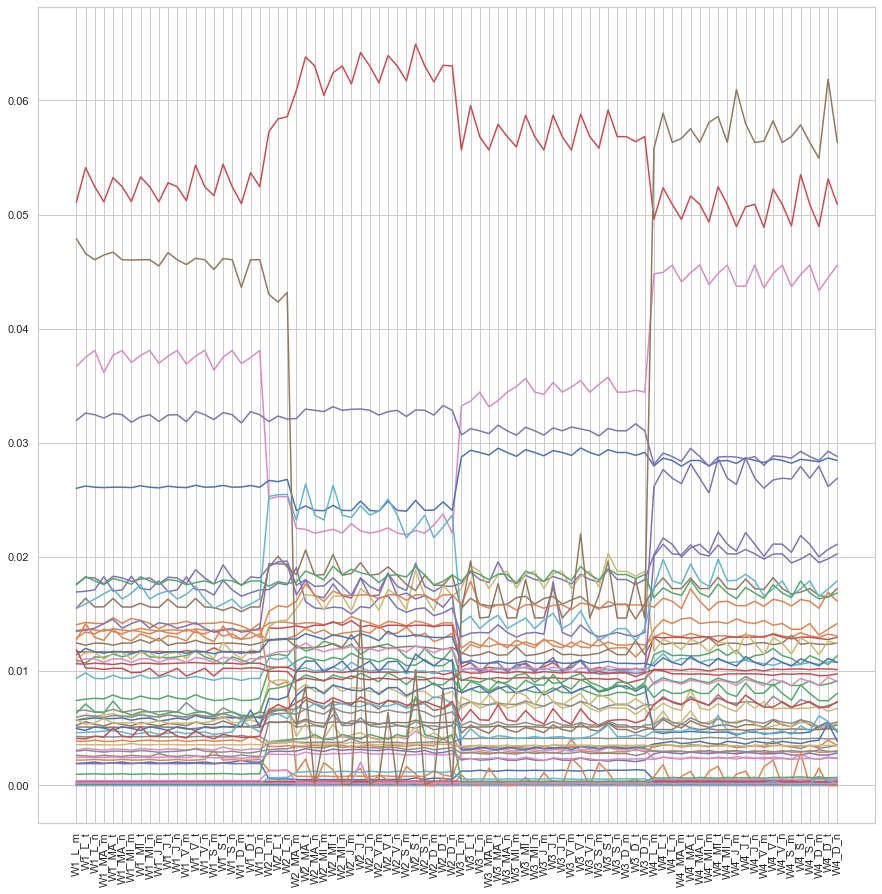

In [38]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90 )
for i in range(len(grupo0)):
    serie=grupo0.iloc[i,30:-2]  
    plt.plot(serie)

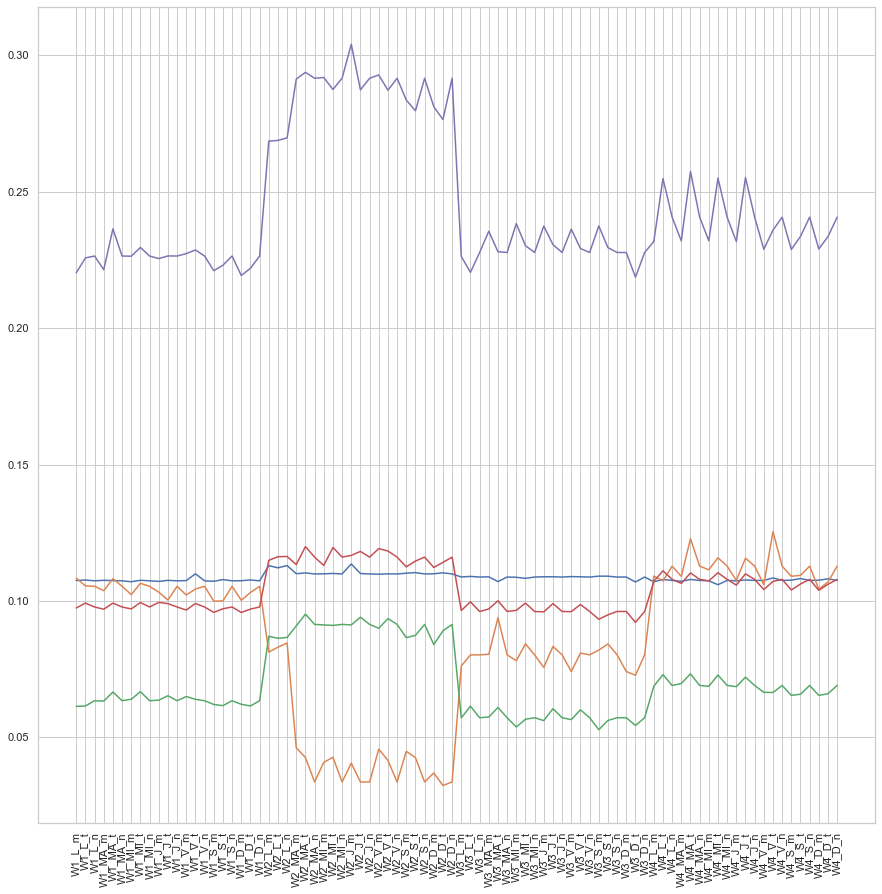

In [39]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90 )
for i in range(len(grupo1)):
    serie=grupo1.iloc[i,30:-2]
    #serie=(serie-serie.min())/(serie.max()-serie.min())
    plt.plot(serie)

### First Cluster Analysis

In [41]:
grupo0["CLASIFICACION"].value_counts()

SUBESTACION              17
ENTIDAD PRIVADA           7
IGLESIA                   6
COMISARIATO               5
ESTACION DE BOMBEO        4
SECADORA DE MAIZ          3
ENTIDAD PUBLICA           3
PILADORA                  3
COMERCIAL                 3
FARMACIA                  2
CULTIVOS AGRICOLAS        2
ENVASADORA DE AGUA        1
BANCO                     1
CENTRO DE SALUD           1
VENTA DE AGROQUIMICOS     1
SALON DE EVENTOS          1
INGENIO AZUCARERO         1
LUBRICADORA               1
PANADERIA                 1
CONCESIONARIA             1
CLINICA                   1
GASOLINERA                1
FUMIGACION AEREA          1
Name: CLASIFICACION, dtype: int64

### Second Cluster Analysis

In [43]:
grupo1["CLASIFICACION"].value_counts()

ENTIDAD PRIVADA       3
ENTIDAD MUNICIPAL     1
ESTACION DE BOMBEO    1
Name: CLASIFICACION, dtype: int64

### CLUSTERS CONSUMO POR FRANJAS HORARIAS (0-11, 12-18, 19-23), SEMANAS (W1,W2,W3,W4) Y DIAS (L-J, V, S-D) POR MEDIO DE DTW

In [42]:
def DTWDistance(s1, s2,w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [43]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return sqrt(LB_sum)

In [44]:
def sse(centroids, indicesSeries, timeSeries):
    sumaI = 0
    countI = 0
    for c in range(len(centroids)):
        suma = 0
        count = 0
        cent = centroids[c]
        try:
          indices = indicesSeries[c]
        except:
          return None
        for i in indices:
            
          s = timeSeries[i]
          suma += DTWDistance(cent,s,5)**2
          count += 1

        #suma = suma / count
        sumaI += suma
        countI +=1
    #sumaI /= countI
    return sumaI

In [45]:
def graph_best_n(timeSeries,num_clusters, interactions = 5, w = 5):
  distances = [np.inf]

  for n in range(1,num_clusters):
      print("para n = {} clusters: ".format(n))
      centroids, indicesTimeSeries = k_means_clust(timeSeries.copy(),n,interactions,w)
      print(indicesTimeSeries)
      d = sse(centroids,indicesTimeSeries, Series )
      distances.append(d)
      
  w = pd.Series(distances).interpolate()
  fig = plt.figure()
  plt.plot(w)
  plt.stem(w)
  return distances
  

In [46]:
def graph_centroids(centroids):
  fig = plt.figure(figsize = (15, 10))
  ax = plt.subplot(111)
  for i in range(len(centroids)):
    centroid = centroids[i]
    ax.plot(centroid, label = i)
  ax.legend()
#plt.show()

In [47]:
def graph_timeSeries_clust( clust_dict, clust_number, normalize = False):
  selected_clust = clust_dict[clust_number]
  Series, meters2 = extract_timeSeries(selected_clust, normalize)
  figure = plt.figure(figsize=(15,10))
  for i in Series:
    plt.plot(i)

In [48]:
def get_df_clust(indicesTimeSeries, meters):
  df_clust = {}
  for i in indicesTimeSeries:
    if(i != "ninguno"):
      timeSeriesClus = indicesTimeSeries[i]
      metersClust = meters[timeSeriesClus]
      new_df_clust = df[df["medidor"].isin(metersClust)]
      df_clust[i] = new_df_clust
  return df_clust

In [49]:
def extract_timeSeries(dataframe, normalize = False):
  Series = []
  count = 0
  missing_count = 0
  meters = []

  for n,g in dataframe.groupby(["medidor"]):
      #g.set_index("fecha", inplace = True)

      g = g.resample("4H").mean()
      date = (g.index.date[0])

      idx = pd.date_range(date, periods=6, freq='4H')
      s = pd.Series(np.nan, index = idx)
      s = s.loc[(s.index.hour >= 4) & (s.index.hour <= 18)]

      serie = g["kwh_consumido"]
      serie = serie[(serie.index.hour >= 6) & (serie.index.hour <= 18)]
      #serie = serie.add(s, fill_value = None)
      serie = serie.interpolate(method = "time", limit_direction = "both")
      #nornalizing
      if(normalize):
        serie = (serie - serie.mean()) / (serie.max() - serie.min())
      #print(len(serie), count)

      #print(len(serie))
      if(len(serie) == 366):
        if (serie.isnull().sum() == 0):   
          meters.append(n)
          Series.append(serie)
      #print(str(n) + ":   " + str(min(g.index.hour)) +"--" + str(max(g.index.hour)) +"  Tamaño: " + str(len(g)) + " indice: " + str(count))
      #if (serie.isnull().sum() != 0):
          #print(count)
          #print(serie)
      count +=1
  meters = np.array(meters)
  
  return Series, meters

In [50]:
import random
def k_means_clust(data,num_clust,num_iter,w=5):
    centroids=random.sample(list(data).copy(),num_clust)
    #print("Centroids")
    #print(centroids)
    counter=0
    for n in range(num_iter):
        counter+=1
        #print( counter)
        assignments={}
        #assign data points to clusters
        
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust="ninguno"
            for c_ind,j in enumerate(centroids):
                #print("Iteracion#: {}, data {}, centroid: {}".format(n,ind,c_ind))
                if LB_Keogh(i,j,w)<min_dist:
                    cur_dist=DTWDistance(i,j,w)
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[ind]
    
        #recalculate centroids of clusters
        #print("recalculating centroids of clusters")
        for key in assignments:
            if(key != "ninguno"):
                clust_sum=0
                for k in assignments[key]:
                    u = data[k].copy()
                    clust_sum=clust_sum + u
                #print("------------------")
                #print(clust_sum)
                #print(len(assignments[key]))
                #print("------------")
                centroids[key]=[m/len(assignments[key]) for m in clust_sum]
    
    return centroids, assignments

In [51]:
A=df_medidor_mes_franjas
A

,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_J_n,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n
medidor,,,,,,,,,,,,,,,,,,,,,
15029835,0.001939,1.976659e-03,2.052503e-03,0.001938,0.001974,2.052503e-03,0.001939,0.001963,2.052503e-03,1.949691e-03,...,0.000505,0.000473,0.000486,0.000505,0.000485,0.000528,0.000505,0.000781,5.327939e-04,0.000505
15029844,0.002224,2.227553e-03,2.284335e-03,0.002224,0.002224,2.284335e-03,0.002231,0.002227,2.284335e-03,2.203355e-03,...,0.003054,0.002903,0.002918,0.003054,0.002920,0.002920,0.003054,0.002916,2.920927e-03,0.003054
15029846,0.107484,1.076711e-01,1.073821e-01,0.107573,0.107465,1.073821e-01,0.107041,0.107577,1.073821e-01,1.071677e-01,...,0.107530,0.107520,0.108431,0.107530,0.107628,0.108206,0.107530,0.107608,1.081048e-01,0.107530
15029847,0.007442,7.565034e-03,7.635612e-03,0.007589,0.007925,7.635612e-03,0.007558,0.007829,7.635612e-03,7.570069e-03,...,0.009156,0.008946,0.008765,0.009156,0.008750,0.008770,0.009156,0.008759,8.896325e-03,0.009156
15029977,0.010659,1.063335e-02,1.070739e-02,0.010667,0.010598,1.070739e-02,0.010550,0.010705,1.070739e-02,1.063957e-02,...,0.009778,0.009733,0.009646,0.009778,0.009738,0.009787,0.009778,0.009619,9.635407e-03,0.009778
15842885,0.001906,1.914183e-03,1.911589e-03,0.001907,0.001998,1.911589e-03,0.001911,0.001960,1.911589e-03,1.914395e-03,...,0.002838,0.002767,0.002783,0.002838,0.002671,0.002670,0.002838,0.002674,2.669264e-03,0.002838
15842894,0.005253,5.587316e-03,5.353838e-03,0.005213,0.005495,5.353838e-03,0.005213,0.005511,5.353838e-03,5.225752e-03,...,0.005311,0.005112,0.005711,0.005311,0.005151,0.005758,0.005311,0.005034,5.032960e-03,0.005311
16567743,0.003088,3.239592e-03,3.176743e-03,0.003090,0.003193,3.176743e-03,0.003086,0.003232,3.176743e-03,3.124529e-03,...,0.002404,0.002314,0.002485,0.002404,0.002314,0.002721,0.002404,0.002312,2.481916e-03,0.002404
16567746,0.004301,4.263098e-03,4.285610e-03,0.004270,0.004252,4.285610e-03,0.004277,0.004259,4.285610e-03,4.268204e-03,...,0.004114,0.004148,0.004075,0.004114,0.004148,0.004070,0.004114,0.004140,4.070039e-03,0.004114


para n = 1 clusters: 
{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]}
para n = 2 clusters: 
{0: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71], 1: [2, 44, 51, 57, 69]}
para n = 3 clusters: 
{1: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36, 38, 39, 40, 41, 43, 47, 48, 49, 52, 54, 55, 56, 60, 61, 62, 64, 67, 71], 2: [2, 44, 57, 69], 0: [32, 35, 37, 42, 45, 46, 50, 51, 53, 58, 59, 63, 65, 66, 68, 70]}
para n = 4 clusters: 
{3: [0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,

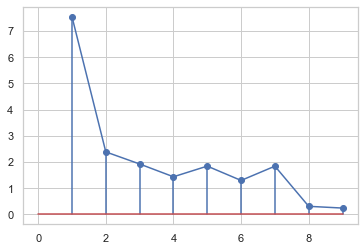

In [52]:
Series = []
meters=[]
for i in range(len(A)):
    serie=A.iloc[i,:]
    Series.append(serie)
    meters.append(A.index[i])
distances = graph_best_n(Series,10)

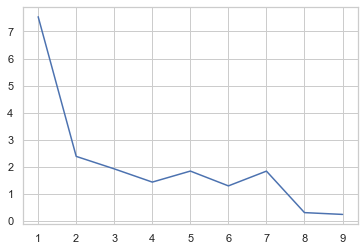

In [53]:
plt.plot(distances)

### Extracting dataframes from clusters

In [54]:
num_clusters = 6
centroids, indicesTimeSeries = k_means_clust(Series.copy(),num_clusters,5,20)
indicesTimeSeries

{4: [0, 27, 30, 55],
 2: [1, 5, 7, 8, 22, 28, 36, 49, 54, 60, 62],
 5: [2, 44, 57, 69],
 1: [3,
  4,
  6,
  29,
  31,
  32,
  33,
  34,
  38,
  39,
  40,
  41,
  42,
  43,
  47,
  50,
  52,
  56,
  61,
  64,
  67,
  71],
 0: [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 48],
 3: [35, 37, 45, 46, 51, 53, 58, 59, 63, 65, 66, 68, 70]}

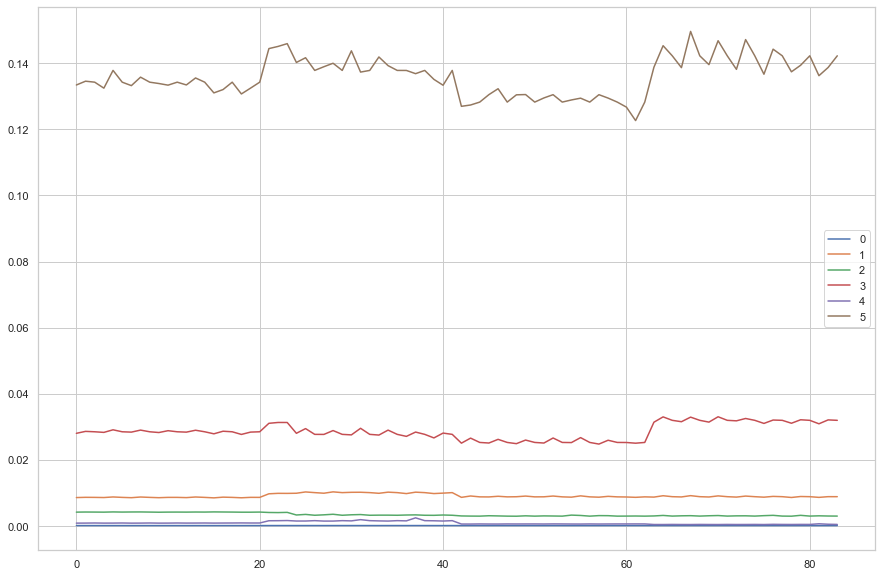

In [55]:
graph_centroids(centroids)

In [56]:
meters = np.array(meters)
df_clust = get_df_clust(indicesTimeSeries, meters)
df_clust

KeyError: 'medidor'

In [ ]:
df_clust_1 = df_clust[0]
df_clust_1

In [ ]:

df_clust_1_consumo = df_clust_1[['medidor','W1_L_m','W1_L_t','W1_L_n','W1_MA_m','W1_MA_t','W1_MA_n','W1_MI_m','W1_MI_t','W1_MI_n','W1_J_m','W1_J_t','W1_J_n','W1_V_m','W1_V_t','W1_V_n','W1_S_m','W1_S_t','W1_S_n','W1_D_m','W1_D_t','W1_D_n','W2_L_m','W2_L_t','W2_L_n','W2_MA_m','W2_MA_t','W2_MA_n','W2_MI_m','W2_MI_t','W2_MI_n','W2_J_m','W2_J_t','W2_J_n','W2_V_m','W2_V_t','W2_V_n','W2_S_m','W2_S_t','W2_S_n','W2_D_m','W2_D_t','W2_D_n','W3_L_m','W3_L_t','W3_L_n','W3_MA_m','W3_MA_t','W3_MA_n','W3_MI_m','W3_MI_t','W3_MI_n','W3_J_m','W3_J_t','W3_J_n','W3_V_m','W3_V_t','W3_V_n','W3_S_m','W3_S_t','W3_S_n','W3_D_m','W3_D_t','W3_D_n','W4_L_m','W4_L_t','W4_L_n','W4_MA_m','W4_MA_t','W4_MA_n','W4_MI_m','W4_MI_t','W4_MI_n','W4_J_m','W4_J_t','W4_J_n','W4_V_m','W4_V_t','W4_V_n','W4_S_m','W4_S_t','W4_S_n','W4_D_m','W4_D_t','W4_D_n']].groupby('medidor').sum()


df_clust_2 = df_clust[1]
df_clust_2_consumo = df_clust_2[['medidor','W1_L_m','W1_L_t','W1_L_n','W1_MA_m','W1_MA_t','W1_MA_n','W1_MI_m','W1_MI_t','W1_MI_n','W1_J_m','W1_J_t','W1_J_n','W1_V_m','W1_V_t','W1_V_n','W1_S_m','W1_S_t','W1_S_n','W1_D_m','W1_D_t','W1_D_n','W2_L_m','W2_L_t','W2_L_n','W2_MA_m','W2_MA_t','W2_MA_n','W2_MI_m','W2_MI_t','W2_MI_n','W2_J_m','W2_J_t','W2_J_n','W2_V_m','W2_V_t','W2_V_n','W2_S_m','W2_S_t','W2_S_n','W2_D_m','W2_D_t','W2_D_n','W3_L_m','W3_L_t','W3_L_n','W3_MA_m','W3_MA_t','W3_MA_n','W3_MI_m','W3_MI_t','W3_MI_n','W3_J_m','W3_J_t','W3_J_n','W3_V_m','W3_V_t','W3_V_n','W3_S_m','W3_S_t','W3_S_n','W3_D_m','W3_D_t','W3_D_n','W4_L_m','W4_L_t','W4_L_n','W4_MA_m','W4_MA_t','W4_MA_n','W4_MI_m','W4_MI_t','W4_MI_n','W4_J_m','W4_J_t','W4_J_n','W4_V_m','W4_V_t','W4_V_n','W4_S_m','W4_S_t','W4_S_n','W4_D_m','W4_D_t','W4_D_n']].groupby('medidor').sum()

df_clust_3 = df_clust[2]
df_clust_3_consumo = df_clust_3[['medidor','W1_L_m','W1_L_t','W1_L_n','W1_MA_m','W1_MA_t','W1_MA_n','W1_MI_m','W1_MI_t','W1_MI_n','W1_J_m','W1_J_t','W1_J_n','W1_V_m','W1_V_t','W1_V_n','W1_S_m','W1_S_t','W1_S_n','W1_D_m','W1_D_t','W1_D_n','W2_L_m','W2_L_t','W2_L_n','W2_MA_m','W2_MA_t','W2_MA_n','W2_MI_m','W2_MI_t','W2_MI_n','W2_J_m','W2_J_t','W2_J_n','W2_V_m','W2_V_t','W2_V_n','W2_S_m','W2_S_t','W2_S_n','W2_D_m','W2_D_t','W2_D_n','W3_L_m','W3_L_t','W3_L_n','W3_MA_m','W3_MA_t','W3_MA_n','W3_MI_m','W3_MI_t','W3_MI_n','W3_J_m','W3_J_t','W3_J_n','W3_V_m','W3_V_t','W3_V_n','W3_S_m','W3_S_t','W3_S_n','W3_D_m','W3_D_t','W3_D_n','W4_L_m','W4_L_t','W4_L_n','W4_MA_m','W4_MA_t','W4_MA_n','W4_MI_m','W4_MI_t','W4_MI_n','W4_J_m','W4_J_t','W4_J_n','W4_V_m','W4_V_t','W4_V_n','W4_S_m','W4_S_t','W4_S_n','W4_D_m','W4_D_t','W4_D_n']].groupby('medidor').sum()

df_clust_4 = df_clust[3]
df_clust_4_consumo = df_clust_4[['medidor','W1_L_m','W1_L_t','W1_L_n','W1_MA_m','W1_MA_t','W1_MA_n','W1_MI_m','W1_MI_t','W1_MI_n','W1_J_m','W1_J_t','W1_J_n','W1_V_m','W1_V_t','W1_V_n','W1_S_m','W1_S_t','W1_S_n','W1_D_m','W1_D_t','W1_D_n','W2_L_m','W2_L_t','W2_L_n','W2_MA_m','W2_MA_t','W2_MA_n','W2_MI_m','W2_MI_t','W2_MI_n','W2_J_m','W2_J_t','W2_J_n','W2_V_m','W2_V_t','W2_V_n','W2_S_m','W2_S_t','W2_S_n','W2_D_m','W2_D_t','W2_D_n','W3_L_m','W3_L_t','W3_L_n','W3_MA_m','W3_MA_t','W3_MA_n','W3_MI_m','W3_MI_t','W3_MI_n','W3_J_m','W3_J_t','W3_J_n','W3_V_m','W3_V_t','W3_V_n','W3_S_m','W3_S_t','W3_S_n','W3_D_m','W3_D_t','W3_D_n','W4_L_m','W4_L_t','W4_L_n','W4_MA_m','W4_MA_t','W4_MA_n','W4_MI_m','W4_MI_t','W4_MI_n','W4_J_m','W4_J_t','W4_J_n','W4_V_m','W4_V_t','W4_V_n','W4_S_m','W4_S_t','W4_S_n','W4_D_m','W4_D_t','W4_D_n']].groupby('medidor').sum()

df_clust_5 = df_clust[4]
df_clust_5_consumo = df_clust_5[['medidor','W1_L_m','W1_L_t','W1_L_n','W1_MA_m','W1_MA_t','W1_MA_n','W1_MI_m','W1_MI_t','W1_MI_n','W1_J_m','W1_J_t','W1_J_n','W1_V_m','W1_V_t','W1_V_n','W1_S_m','W1_S_t','W1_S_n','W1_D_m','W1_D_t','W1_D_n','W2_L_m','W2_L_t','W2_L_n','W2_MA_m','W2_MA_t','W2_MA_n','W2_MI_m','W2_MI_t','W2_MI_n','W2_J_m','W2_J_t','W2_J_n','W2_V_m','W2_V_t','W2_V_n','W2_S_m','W2_S_t','W2_S_n','W2_D_m','W2_D_t','W2_D_n','W3_L_m','W3_L_t','W3_L_n','W3_MA_m','W3_MA_t','W3_MA_n','W3_MI_m','W3_MI_t','W3_MI_n','W3_J_m','W3_J_t','W3_J_n','W3_V_m','W3_V_t','W3_V_n','W3_S_m','W3_S_t','W3_S_n','W3_D_m','W3_D_t','W3_D_n','W4_L_m','W4_L_t','W4_L_n','W4_MA_m','W4_MA_t','W4_MA_n','W4_MI_m','W4_MI_t','W4_MI_n','W4_J_m','W4_J_t','W4_J_n','W4_V_m','W4_V_t','W4_V_n','W4_S_m','W4_S_t','W4_S_n','W4_D_m','W4_D_t','W4_D_n']].groupby('medidor').sum()

df_clust_6 = df_clust[5]
df_clust_6_consumo = df_clust_6[['medidor','W1_L_m','W1_L_t','W1_L_n','W1_MA_m','W1_MA_t','W1_MA_n','W1_MI_m','W1_MI_t','W1_MI_n','W1_J_m','W1_J_t','W1_J_n','W1_V_m','W1_V_t','W1_V_n','W1_S_m','W1_S_t','W1_S_n','W1_D_m','W1_D_t','W1_D_n','W2_L_m','W2_L_t','W2_L_n','W2_MA_m','W2_MA_t','W2_MA_n','W2_MI_m','W2_MI_t','W2_MI_n','W2_J_m','W2_J_t','W2_J_n','W2_V_m','W2_V_t','W2_V_n','W2_S_m','W2_S_t','W2_S_n','W2_D_m','W2_D_t','W2_D_n','W3_L_m','W3_L_t','W3_L_n','W3_MA_m','W3_MA_t','W3_MA_n','W3_MI_m','W3_MI_t','W3_MI_n','W3_J_m','W3_J_t','W3_J_n','W3_V_m','W3_V_t','W3_V_n','W3_S_m','W3_S_t','W3_S_n','W3_D_m','W3_D_t','W3_D_n','W4_L_m','W4_L_t','W4_L_n','W4_MA_m','W4_MA_t','W4_MA_n','W4_MI_m','W4_MI_t','W4_MI_n','W4_J_m','W4_J_t','W4_J_n','W4_V_m','W4_V_t','W4_V_n','W4_S_m','W4_S_t','W4_S_n','W4_D_m','W4_D_t','W4_D_n']].groupby('medidor').sum()

#df_clust_7 = df_clust[6]
#df_clust_7 = df_clust_7[['medidor','W1_L_m','W1_L_t','W1_L_n','W1_MA_m','W1_MA_t','W1_MA_n','W1_MI_m','W1_MI_t','W1_MI_n','W1_J_m','W1_J_t','W1_J_n','W1_V_m','W1_V_t','W1_V_n','W1_S_m','W1_S_t','W1_S_n','W1_D_m','W1_D_t','W1_D_n','W2_L_m','W2_L_t','W2_L_n','W2_MA_m','W2_MA_t','W2_MA_n','W2_MI_m','W2_MI_t','W2_MI_n','W2_J_m','W2_J_t','W2_J_n','W2_V_m','W2_V_t','W2_V_n','W2_S_m','W2_S_t','W2_S_n','W2_D_m','W2_D_t','W2_D_n','W3_L_m','W3_L_t','W3_L_n','W3_MA_m','W3_MA_t','W3_MA_n','W3_MI_m','W3_MI_t','W3_MI_n','W3_J_m','W3_J_t','W3_J_n','W3_V_m','W3_V_t','W3_V_n','W3_S_m','W3_S_t','W3_S_n','W3_D_m','W3_D_t','W3_D_n','W4_L_m','W4_L_t','W4_L_n','W4_MA_m','W4_MA_t','W4_MA_n','W4_MI_m','W4_MI_t','W4_MI_n','W4_J_m','W4_J_t','W4_J_n','W4_V_m','W4_V_t','W4_V_n','W4_S_m','W4_S_t','W4_S_n','W4_D_m','W4_D_t','W4_D_n']].groupby('medidor').sum()



In [ ]:
display(df_clust_1_consumo, df_clust_2_consumo, df_clust_3_consumo,df_clust_4_consumo,df_clust_5_consumo,df_clust_6_consumo)

In [ ]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90 )
for i in range(len(df_clust_1_consumo)):
    fila=df_clust_1_consumo.iloc[i,:]
    plt.plot(fila)

In [ ]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90 )
for i in range(len(df_clust_2_consumo)):
    fila=df_clust_2_consumo.iloc[i,:]
    plt.plot(fila)

In [ ]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90 )
for i in range(len(df_clust_3_consumo)):
    fila=df_clust_3_consumo.iloc[i,:]
    plt.plot(fila)

In [ ]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90 )
for i in range(len(df_clust_4_consumo)):
    fila=df_clust_4_consumo.iloc[i,:]
    plt.plot(fila)

In [ ]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90 )
for i in range(len(df_clust_5_consumo)):
    fila=df_clust_5_consumo.iloc[i,:]
    plt.plot(fila)

In [ ]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90 )
for i in range(len(df_clust_6_consumo)):
    fila=df_clust_6_consumo.iloc[i,:]
    plt.plot(fila)

### First cluster

In [ ]:
df_clust_1

In [ ]:
df_clust_1["CLASIFICACION"].value_counts()

### Second cluster

In [ ]:
df_clust_2["CLASIFICACION"].value_counts()

### Third cluster

In [ ]:
df_clust_3["CLASIFICACION"].value_counts()

### Fourth cluster

In [ ]:
df_clust_4["CLASIFICACION"].value_counts()

 ### Fifth cluster 

In [ ]:
df_clust_5["CLASIFICACION"].value_counts()

### Sixth cluster

In [ ]:
df_clust_6["CLASIFICACION"].value_counts()

In [ ]:
from dtaidistance import clustering
from dtaidistance import dtw

In [ ]:

# Custom Hierarchical clustering
model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
cluster_idx = model1.fit(Series.copy())
# Augment Hierarchical object to keep track of the full tree
model2 = clustering.HierarchicalTree(model1)
cluster_idx = model2.fit(Series.copy())
# SciPy linkage clustering
model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(Series.copy())